<a href="https://colab.research.google.com/github/misqualzarabi/misqualzarabi.github.io/blob/master/Applying_Logistic_RegressionCV_on_mushroom_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
!pip install -q kaggle           # installing Kaggle to upload the dataset into Colab

In [50]:
uploaded = files.upload()         # Uploading the API token from locally 
                                    # that i created from my Kaggle's acccount

Saving kaggle.json to kaggle (3).json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [52]:
!kaggle datasets download -d uciml/mushroom-classification       # Once i have uploaded the json
                                                             # it will create a file with the name of dataset in colab

mushroom-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [53]:
from zipfile import ZipFile
file_name = "mushroom-classification.zip"

with ZipFile(file_name,'r') as zip:
   zip.extractall()
   print('Done')
               # uploading the mushroom classification dataset zip file
                              # which will convert into csv file for use as pandas dataframe                  
  


Done


In [54]:
!pip install category_encoders==2.*        #installing category encoders to encode categorical variables

In [0]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split                  # importing all the libraries that are needed
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import category_encoders as ce


In [56]:
df = pd.read_csv("mushrooms.csv")
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [57]:
df['class'].value_counts(normalize=True)       # begin with baseline of a target variable

e    0.517971
p    0.482029
Name: class, dtype: float64

In [58]:
df.isnull().sum()             # checking all the missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [59]:
df.describe().T.sort_values(by='unique')

,count,unique,top,freq
veil-type,8124,1,p,8124
class,8124,2,e,4208
bruises,8124,2,f,4748
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
stalk-shape,8124,2,t,4608
ring-number,8124,3,o,7488
cap-surface,8124,4,y,3244
veil-color,8124,4,w,7924


In [60]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [0]:
y = df["class"]        # setting "class" variable as target
x = df.drop('class',axis=1)       # and all the other columns as features




> before applying our model on dataset we need to encode all the categorical variables into numeric data


> To do so i have decided to apply label encoding on the target variable and
one hot encoding on all the other columns





In [0]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [0]:
x = pd.get_dummies(x)         # for one hot encoding i have used dummy function from pandas

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, stratify=y, random_state=42) # train_test_split by 80/20

In [65]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6499, 117) (1625, 117) (6499,) (1625,)


In [0]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)      # scaling the data
x_test_scaled = scaler.transform(x_test)

In [67]:
model = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=0)

model.fit(x_train_scaled, y_train)               # Applying the logisticRegressionCV model on training data and checking the Accuracy on test set

print('Validation Accuracy', model.score(x_test_scaled, y_test))

Validation Accuracy 0.9987692307692307




*   Getting the accuracy rate 100% does not look right. It seems an overfitted model, reason for this is either there is some data leakage or it is not being preprocessed well enough.
*   So instead of applying another supervised machine learning model , i decided to apply same model with some changes to see if it would make any difference on the performance of the model.



In [0]:
encoder = ce.OrdinalEncoder()
df_2 = encoder.fit_transform(df)       # Now applying the ordinal encoder of all the dataset

In [69]:
df_2.corr()['class'].sort_values(ascending=False)    # checking the correlation of the target variable with other features

class                       1.000000
gill-size                   0.540024
gill-spacing                0.348387
cap-surface                 0.169663
ring-number                 0.152261
gill-attachment             0.129200
veil-color                  0.120766
stalk-shape                 0.102019
cap-color                  -0.042028
stalk-color-below-ring     -0.098476
cap-shape                  -0.112110
population                 -0.155254
habitat                    -0.191297
stalk-color-above-ring     -0.225294
stalk-root                 -0.337542
gill-color                 -0.412869
bruises                    -0.501530
stalk-surface-below-ring   -0.532452
stalk-surface-above-ring   -0.552044
ring-type                  -0.556515
spore-print-color          -0.560715
odor                       -0.582015
veil-type                        NaN
Name: class, dtype: float64



--- This time used highly correlated features instaed of using all of the variables.



In [0]:
target = 'class'
features = ['gill-size','gill-spacing','cap-surface','ring-number','gill-attachment','veil-color','stalk-shape']

In [0]:
train, test = train_test_split(df_2, train_size=0.80, random_state=42)

In [0]:
X_train = train[features]
X_test = test[features]
Y_train = train[target]
Y_test = test[target]

In [74]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6499, 7) (1625, 7) (6499,) (1625,)


In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
model = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=0)

model.fit(X_train_scaled, Y_train)

print('Validation Accuracy', model.score(X_test_scaled, Y_test))       #got the accuracy rate much better than before

Validation Accuracy 0.832


In [77]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [0]:
from sklearn.metrics import plot_confusion_matrix

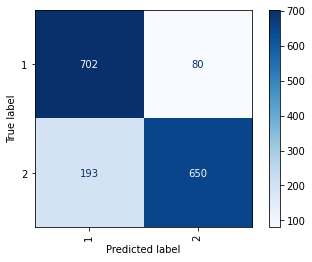

In [79]:
plot_confusion_matrix(model, X_test_scaled, Y_test,
                      values_format='.0f', xticks_rotation='vertical', cmap='Blues');

In [0]:
y_pred = model.predict(X_test_scaled)    # predicted vlues of test data

In [81]:
from sklearn.metrics import classification_report
                                                          # getting the precision and recall score
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           1       0.90      0.78      0.84       895
           2       0.77      0.89      0.83       730

    accuracy                           0.83      1625
   macro avg       0.83      0.84      0.83      1625
weighted avg       0.84      0.83      0.83      1625

